<a href="https://colab.research.google.com/github/NohemiVargas/Procesamiento_y_clasificacion_datos/blob/main/Tarea2/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2. Laura Nohemí Vargas de la Rosa
#Exploración de algoritmos de clasificación para identificar el nivel de riesgo en el embarazo




# Algoritmos de clasificacion

- K-nearest neighbor
- Arbol de decision
- Random Forest
- Maquina de soporte vectorial

## Declaración de librerías

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC


## Carga de datos


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colaboratory/Procesamiento y clasificación de Datos/Tarea 1/Maternal Health Risk Data Set.csv')

In [71]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [72]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [73]:
data['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
data['RiskLevel'] = data['RiskLevel'].astype(float)
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


In [74]:
data2 = data.drop('RiskLevel', axis=1)
data2.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


## Estandarización

In [75]:
sc=StandardScaler()
#sc=MinMaxScaler()
data_standard=sc.fit_transform(data2)
data_standard=pd.DataFrame(data_standard)
data_standard.columns=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
data_standard.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,0.210054


In [76]:
data_standard['RiskLevel']=data['RiskLevel']
data_standard.head(4)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956,3.0
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088,3.0
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815,3.0
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088,3.0


In [77]:
#split dataset in features and target variable
feature_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
X = data_standard[feature_cols] # Features
y = data_standard.RiskLevel # Target variable

In [78]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

## K-nearest neighbor

In [79]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8363312685948397
Best Parameters: {'n_neighbors': 1}


In [80]:
#model 
knn2=KNeighborsClassifier(n_neighbors=1)

In [81]:
# fit the model with data
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [82]:
y_pred = knn2.predict(X_test)

In [83]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[77, 21,  5],
       [ 7, 74,  8],
       [ 2,  1, 59]])

In [84]:
y_pred2=pd.DataFrame(y_pred)
y_test2=pd.DataFrame(y_test)
y_test3=y_test2.reset_index()
df = y_test3.assign(y_pred2= y_pred2)
df

,index,RiskLevel,y_pred2
0,494,1.0,1.0
1,271,1.0,1.0
2,963,3.0,3.0
3,558,1.0,1.0
4,614,3.0,3.0
...,...,...,...
249,909,1.0,1.0
250,644,3.0,3.0
251,164,1.0,1.0
252,795,2.0,1.0


Text(0.5, 257.44, 'Predicted label')

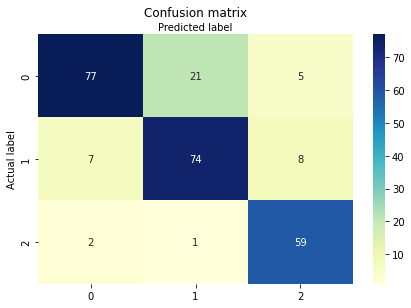

In [85]:
# create heatmap
class_names=[1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
target_names = ['Low Risk', 'Medium Risk', 'High Risk']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.86      0.82      0.84       103
 Medium Risk       0.78      0.78      0.78        89
   High Risk       0.84      0.92      0.88        62

    accuracy                           0.83       254
   macro avg       0.83      0.84      0.83       254
weighted avg       0.83      0.83      0.83       254



## Arbol de decision

In [95]:
#GRIDSEARCH
#create a dictionary of all values we want to test
param_grid = {'criterion':['gini', 'entropy'],'max_depth': list(range(3,15))}
# decision tree model
dtree_model=DecisionTreeClassifier(random_state=1)
#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid)# cv default = 5 = 5-fold cv
 #fit model to data
dtree_gscv.fit(X_train, y_train)
print("Tuned hyperparameters Criterion: {}, Max_depth: {}".format
      (dtree_gscv.best_params_['criterion'],dtree_gscv.best_params_['max_depth'])) 
print("Best score: {}".format(dtree_gscv.best_score_))

Tuned hyperparameters Criterion: gini, Max_depth: 14
Best score: 0.7947368421052632


In [96]:
#model 
dt=DecisionTreeClassifier(criterion = 'gini', max_depth=14, random_state=1)

In [97]:
# fit the model with data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=1)

In [98]:
y_pred = dt.predict(X_test)

In [100]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[84, 15,  4],
       [13, 69,  7],
       [ 1,  4, 57]])

Text(0.5, 15.0, 'Predicted label')

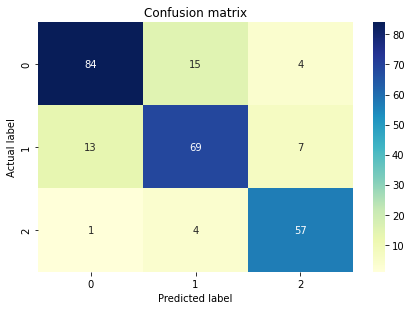

In [101]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.86      0.82      0.84       103
 Medium Risk       0.78      0.78      0.78        89
   High Risk       0.84      0.92      0.88        62

    accuracy                           0.83       254
   macro avg       0.83      0.84      0.83       254
weighted avg       0.83      0.83      0.83       254



## Random forest

In [102]:
#GRIDSEARCH
param_grid = { 
    'n_estimators': [10,50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}
rfc =RandomForestClassifier(random_state=1)
rfc_gscv=GridSearchCV(estimator=rfc, param_grid=param_grid) # cv default = 5
rfc_gscv.fit(X_train,y_train)

print("Tuned best parameters for random forest: ",rfc_gscv.best_params_ ) 
print("Best score: {}".format(rfc_gscv.best_score_))


Tuned best parameters for random forest:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 50}
Best score: 0.7578947368421053


In [103]:
#model 
RF=RandomForestClassifier(criterion = 'gini', max_depth=7, max_features= 'auto', n_estimators= 50, random_state=1)

In [104]:
# fit the model with data
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=1)

In [105]:
y_pred = RF.predict(X_test)

In [106]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[86, 14,  3],
       [29, 51,  9],
       [ 6,  4, 52]])

Text(0.5, 15.0, 'Predicted label')

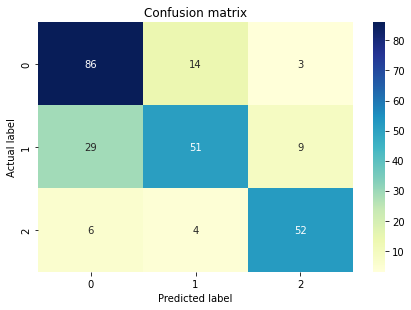

In [107]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [108]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.71      0.83      0.77       103
 Medium Risk       0.74      0.57      0.65        89
   High Risk       0.81      0.84      0.83        62

    accuracy                           0.74       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.75      0.74      0.74       254



## Maquina de soporte vectorial

In [109]:
#GRIDSEARCH
param_grid = { 'C' : [0.001, 0.01, 0.1, 1, 10, 20]}
svm_linear = SVC(kernel="linear")
svm_gscv0 = GridSearchCV(svm_linear,param_grid=param_grid)
svm_gscv0.fit(X_train,y_train)

print("Tuned best parameters for kernel linear svm: ",svm_gscv0.best_params_ ) 
print("Best score: {}".format(svm_gscv0.best_score_))

Tuned best parameters for kernel linear svm:  {'C': 10}
Best score: 0.6723684210526315


In [110]:
#model 
svm=SVC(kernel='linear', C=10, probability=True)

In [111]:
# fit the model with data
svm.fit(X_train, y_train)

SVC(C=10, kernel='linear', probability=True)

In [112]:
y_pred = svm.predict(X_test)

In [113]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[83, 13,  7],
       [44, 28, 17],
       [ 3, 13, 46]])

Text(0.5, 15.0, 'Predicted label')

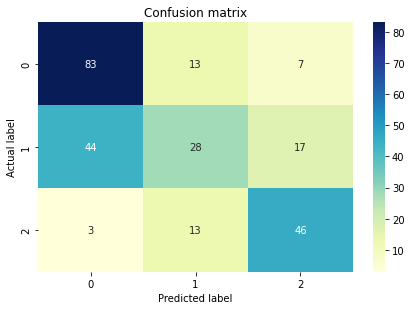

In [114]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [115]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.64      0.81      0.71       103
 Medium Risk       0.52      0.31      0.39        89
   High Risk       0.66      0.74      0.70        62

    accuracy                           0.62       254
   macro avg       0.60      0.62      0.60       254
weighted avg       0.60      0.62      0.60       254

